In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_mean_std_shaded, plot_mean_std_cap
import scienceplots
import orjson
plt.style.use(['science','no-latex'])

In [2]:
data_AR = np.genfromtxt(f'./results/AR_merged.csv', delimiter=',', skip_header=0, skip_footer=0)
data_ED = np.genfromtxt(f'./results/ED_merged.csv', delimiter=',', skip_header=0, skip_footer=0)
data_all = [data_AR, data_ED]

In [3]:
data_AR.shape, data_ED.shape

((200, 42), (200, 42))

In [4]:
def read_data(data):
    score = np.mean(data[:, 2::2], axis=-1)
    score_std = np.std(data[:, 2::2], axis=-1) / np.sqrt(data[:, 2:].shape[1] // 2)
    n_list = data[:, 0]
    dim_list = data[:, 1]
    return n_list, dim_list, score, score_std

In [5]:
n_select = [12, 16, 24, 32, 40]

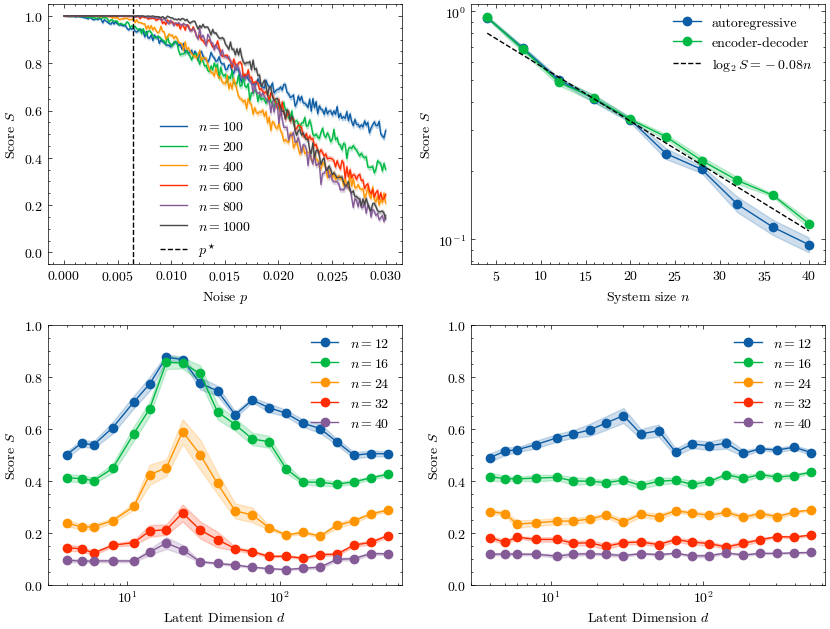

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8.5, 6.5))

with open("noisy_quantum_model.json", "rb") as f:
    res = orjson.loads(f.read())
    # convert to numpy array
    res = {k: np.array(v) for k, v in res.items()}
n_list = [25, 50, 100, 150, 200, 250]
for i, n in enumerate(n_list):
    plot_mean_std_shaded(axes[0][0], res[str(n)][:, 0], res[str(n)][:, 1], res[str(n)][:, 2], color=f'C{i}', label=f"$n={4*n}$")
axes[0][0].vlines(1-(15/16)**(0.1), -0.05, 1.05, color='k', linestyle='--', label=r"$p^\star$")
axes[0][0].legend(loc=(0.3, 0))
axes[0][0].set_xlabel("Noise $p$")
axes[0][0].set_ylabel("Score $S$")
axes[0][0].set_ylim(-0.05, 1.05)

n_list, dim_list, score, score_std = read_data(data_all[0])
plot_mean_std_shaded(axes[0][1], 4 * n_list[dim_list == min(dim_list)], score[dim_list == min(dim_list)], score_std[dim_list == min(dim_list)], color=f'C{0}', label=f'autoregressive', marker='o')
n_list, dim_list, score, score_std = read_data(data_all[1])
plot_mean_std_shaded(axes[0][1], 4 * n_list[dim_list == min(dim_list)], score[dim_list == min(dim_list)], score_std[dim_list == min(dim_list)], color=f'C{1}', label=f'encoder-decoder', marker='o')
k = 0.08
axes[0][1].plot([4, 40], [2**(-k * 4), 2**(-k * 40)], 'k--', label=rf'$\log_2 S = -{k}n$')
axes[0][1].set_yscale('log')
axes[0][1].set_xlabel('System size $n$')
axes[0][1].set_ylabel('Score $S$')
axes[0][1].legend()

n_list, dim_list, score, score_std = read_data(data_all[0])
axes[1][0].set_xlabel('Latent Dimension $d$')
axes[1][0].set_ylabel('Score $S$')
axes[1][0].set_ylim(0, 1.)
axes[1][0].set_xlim(3, 10**2.8)
axes[1][0].set_xscale('log')
ind = 0
for i in np.unique(n_list).astype(int):
    if 4 * i in n_select:
        plot_mean_std_shaded(axes[1][0], dim_list[n_list == i], score[n_list == i], score_std[n_list == i], color=f'C{ind}', label=f'$n = {4 * i}$', marker='o')
        ind += 1
axes[1][0].legend()

n_list, dim_list, score, score_std = read_data(data_all[1])
axes[1][1].set_xlabel('Latent Dimension $d$')
axes[1][1].set_ylabel('Score $S$')
axes[1][1].set_ylim(0, 1.)
axes[1][1].set_xlim(3, 10**2.8)
axes[1][1].set_xscale('log')
ind = 0
for i in np.unique(n_list).astype(int):
    if 4 * i in n_select:
        plot_mean_std_shaded(axes[1][1], dim_list[n_list == i], score[n_list == i], score_std[n_list == i], color=f'C{ind}', label=f'$n = {4 * i}$', marker='o')
        ind += 1
axes[1][1].legend()

plt.tight_layout()

plt.savefig(f'./numerics.pdf')
plt.show()